The Sparks Foundation #GRIPFEB21

Prediction using Unsupervised ML

Name : Sarikaa S

In [1]:
#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
#mounting my google drive where the dataset is present
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
#reading the dataset
dataset = "/mydrive/Iris.csv"

#read_csv in pandas is used to read the csv file
data = pd.read_csv(dataset)
print("Imported the dataset successfully")


Imported the dataset successfully


In [45]:
#Printing the shape of the dataset to know the no.of rows and columns
print(data.shape)
data.head()#This line prints the first five rows of the dataset


(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


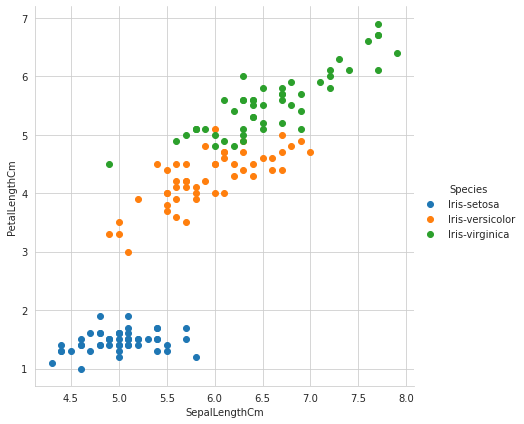

In [51]:
#plotting the dataset
import seaborn as sns 
   
sns.set_style("whitegrid") 
sns.FacetGrid(data, hue ="Species",  
              height = 6).map(plt.scatter,  
                              'SepalLengthCm',
                              'PetalLengthCm').add_legend() 

In [40]:
#inputs are assigned to X
X=data.iloc[:, [1, 2, 3,4]]
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


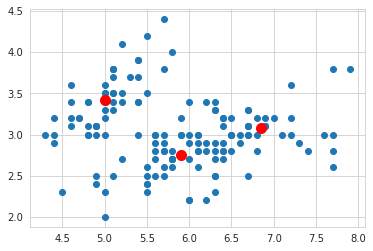

In [59]:
#the model is created and fitted
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, max_iter=300)
km.fit(X)

plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s=100, c='red')
plt.show()

We can see that there are three clusters

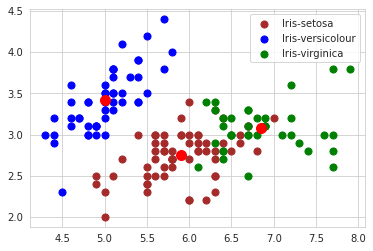

In [64]:
y_km = km.fit_predict(X)
plt.scatter(X.iloc[y_km == 0, 0], X.iloc[y_km == 0, 1], 
            s = 50, c = 'brown', label = 'Iris-setosa')
plt.scatter(X.iloc[y_km == 1, 0], X.iloc[y_km == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X.iloc[y_km == 2, 0], X.iloc[y_km == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s=100, c='red')
plt.legend()

plotting a scatter plot for visualization of the clusters

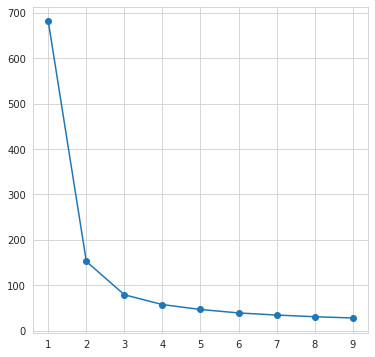

In [42]:
#evaluating the model using "elbow method"
sse=[]
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')

From the plot we can infere that 3 is the optimal number of clusters